<a href="https://colab.research.google.com/github/JackCollins1991/GoogleColabs/blob/LogisticRegressionAssumptions/LogisticRegressionAssumptionsHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from copy import deepcopy
!pip install factor_analyzer
!pip install seaborn

import seaborn as sb
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [76]:
class LogisticRegressionAssumptionsTestSummary:
  def __init__(self, dependant_figure):
    self.dependant_figure = dependant_figure

def LogisticRegressionAssumptionsTest(predictors, dependant):
  class_fig = TestClassBalance(dependant)
  TestLinearityAssumption(predictors)
  TestInfluentialValues(predictors)
  TestMulticollinearity(predictors)
  return class_fig


def TestClassBalance(dependant):
  p = plt.bar(dependant, height = max(dependant.value_counts()))
  return p

def TestLinearityAssumption(predictors):
  
  return 

def TestInfluentialValues(predictors):

  return

def TestMulticollinearity(predictors):

  return


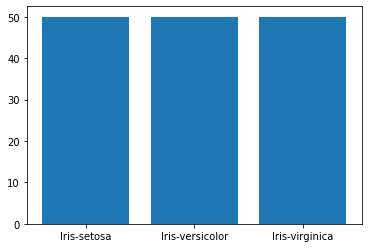

In [78]:
predictors = data.select_dtypes(include='number')
dependant = data["class"]
assumptions_test = LogisticRegressionAssumptionsTest(predictors, dependant)

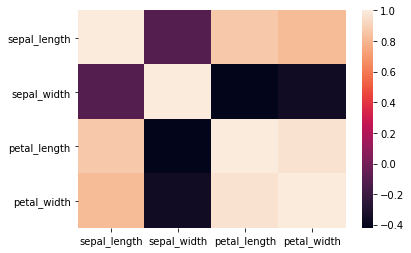

In [79]:
sb.heatmap(predictors.corr())  